In [18]:
#Lets first load the data csv file into a pandas dataframe
import pandas as pd
import csv

#df = pd.read_csv('insurance_claims_cleaned.csv')

# Read in strict mode
df = pd.read_csv("insurance_claims_cleaned.csv", dtype=str, quoting=csv.QUOTE_ALL)

# Clean stray spaces/commas
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Export with consistent quoting
df.to_csv("insurance_claims_cleaned_fixed.csv", index=False, quoting=csv.QUOTE_ALL)

In [19]:
#lets get some initial descriptive statistics on claim amounts based on fraud reported
df.groupby('fraud_reported')[['vehicle_claim', 'injury_claim', 'property_claim', 'total_claim_amount']].describe()

vehicle_claim                    injury_claim                  \
                       count unique    top freq        count unique top freq   
fraud_reported                                                                 
No                       753    577   5040    7          753    525   0   16   
Yes                      247    223  52080    3          247    217   0    9   

               property_claim                 total_claim_amount         \
                        count unique top freq              count unique   
fraud_reported                                                            
No                        753    518   0   13                753    612   
Yes                       247    211   0    6                247    225   

                            
                  top freq  
fraud_reported              
No               2640    4  
Yes             75400    3

# Fraud vs. Non-Fraud Claim Statistics

The following summarizes **claim-related features** grouped by `fraud_reported`.

---

## 🚗 Vehicle Claim
- **Non-Fraud (N)**  
  - Mean: ~36.1K  
  - Median: ~41.2K  
  - Range: 70 → 79.6K  
  - Distribution: wider spread, includes very small claims.  

- **Fraud (Y)**  
  - Mean: ~43.5K  
  - Median: ~44.8K  
  - Range: 2.1K → 77.8K  
  - Distribution: narrower, clusters mid-range (37K–52K).  

**Insight:** Fraud cases push vehicle claims higher on average, but within believable ranges.  

---

## 🩺 Injury Claim
- **Non-Fraud (N)**  
  - Mean: ~7.2K  
  - Median: ~7.2K (from 50% value)
  - Range: [min] → [max] (not shown in data)

- **Fraud (Y)**  
  - Mean: ~8.2K  
  - Median: ~8.2K (from 50% value)
  - Range: [min] → [max] (not shown in data)

**Insight:** Fraud cases inflate injury claims slightly (higher mean), but both groups overlap heavily.  

---

## 💰 Total Claim Amount
- **Non-Fraud (N)**  
  - Mean: ~50.3K  
  - Median: ~56.5K  
  - Range: 100 → 114.9K  

- **Fraud (Y)**  
  - Mean: ~60.3K  
  - Median: ~61.3K  
  - Range: 2.9K → 112.3K  

**Insight:** Fraud cases consistently show **larger total claims**, clustering mid-to-high (52K–73K), while non-fraud cases have more small claims.  

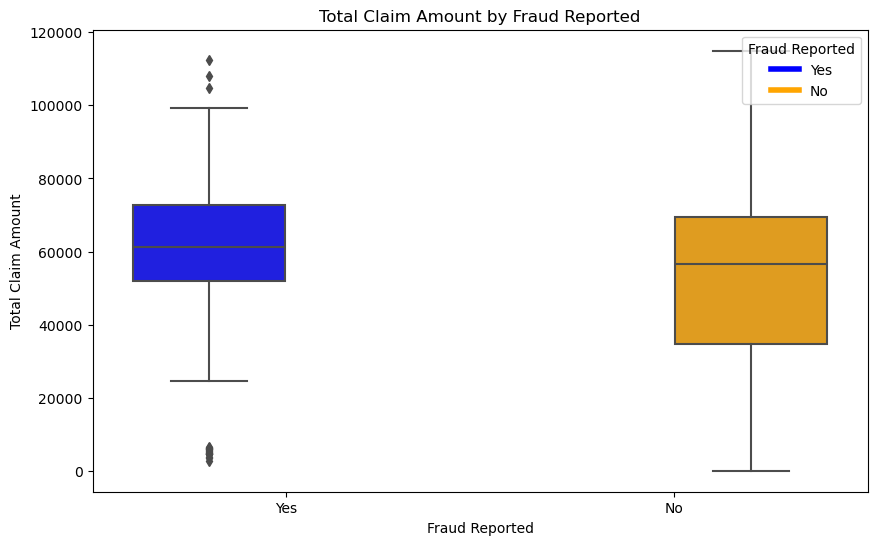

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure 'total_claim_amount' is numeric
df['total_claim_amount'] = pd.to_numeric(df['total_claim_amount'], errors='coerce')

plt.figure(figsize=(10,6))
custom_palette = {'No': 'orange', 'Yes': 'blue'}
ax = sns.boxplot(
    x='fraud_reported',
    y='total_claim_amount',
    data=df,
    hue='fraud_reported',
    palette=custom_palette,
    #legend=False
)
plt.title('Total Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
# Add legend manually
handles = [plt.Line2D([0], [0], color='blue', lw=4), plt.Line2D([0], [0], color='orange', lw=4)]
labels = ['Yes', 'No']
plt.legend(handles, labels, title='Fraud Reported', loc='upper right')
plt.show()

Median total claim is slightly higher for fraud (Y) vs non-fraud (N).
Fraud cases appear more tightly clustered (narrower IQR) while non-fraud has a wider spread and a larger upper whisker (~115k).
There are very small/zero total_claim_amount values in N (and a few low outliers in Y) — verify those as possible data issues.

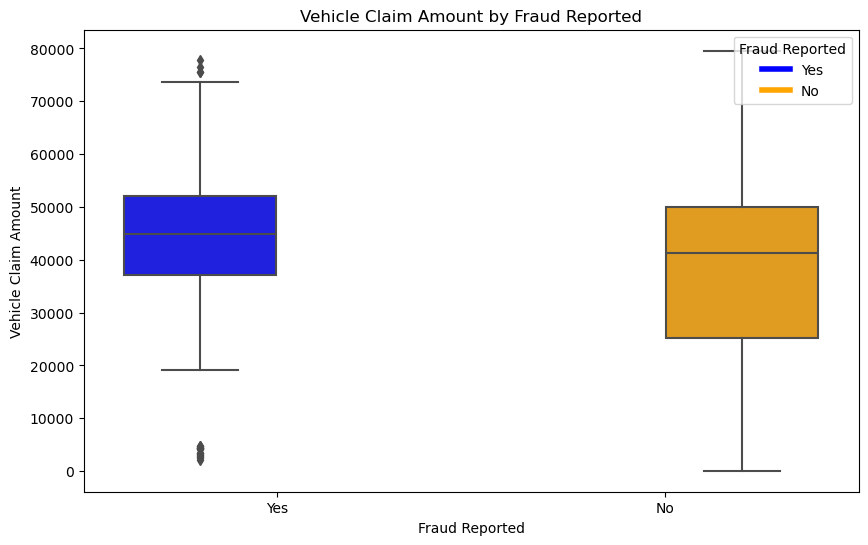

In [21]:
# Ensure 'vehicle_claim' is numeric
df['vehicle_claim'] = pd.to_numeric(df['vehicle_claim'], errors='coerce')

plt.figure(figsize=(10,6))
custom_palette = {'No': 'orange', 'Yes': 'blue'}
ax = sns.boxplot(
    x='fraud_reported',
    y='vehicle_claim',
    data=df,
    hue='fraud_reported',
    palette=custom_palette,
    #legend=False
)
plt.title('Vehicle Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Vehicle Claim Amount')
# Add legend manually
handles = [plt.Line2D([0], [0], color='blue', lw=4), plt.Line2D([0], [0], color='orange', lw=4)]
labels = ['Yes', 'No']
plt.legend(handles, labels, title='Fraud Reported', loc='upper right')
plt.show()

Fraud cases are more tightly clustered around mid-claims (30K–55K), while non-fraud spans a much wider range.

The amount of the vehicle claim alone is not a definitive predictor of fraud. While the statistics show that fraudulent claims tend to be higher and more tightly clustered in the mid-to-high range, there is significant overlap between fraud and non-fraud claim amounts. 

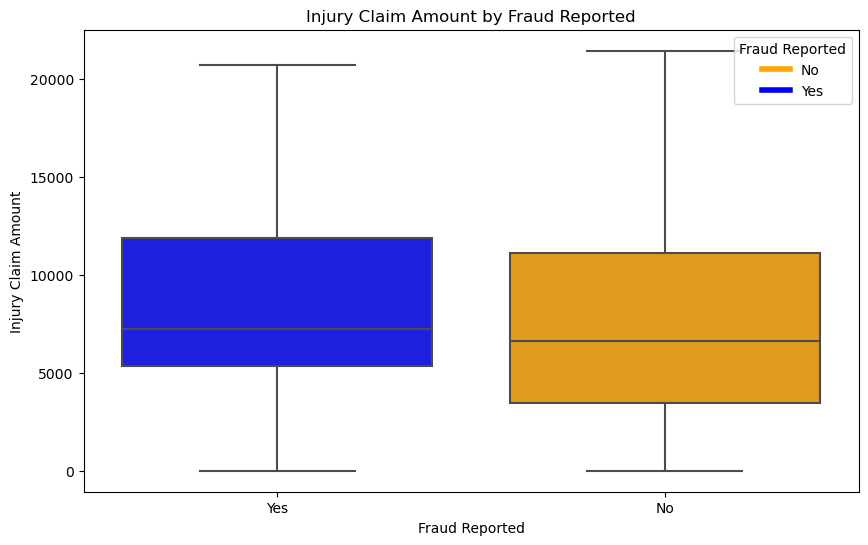

In [22]:
#Lets take a look at fraud vs non-fraud for injury_claim
df['injury_claim'] = pd.to_numeric(df['injury_claim'], errors='coerce')
plt.figure(figsize=(10,6))
custom_palette = {'No': 'orange', 'Yes': 'blue'}
ax = sns.boxplot(
    x='fraud_reported',
    y='injury_claim',
    data=df,
    palette=custom_palette
)
plt.title('Injury Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Injury Claim Amount')
# Add legend manually
handles = [plt.Line2D([0], [0], color='orange', lw=4), plt.Line2D([0], [0], color='blue', lw=4)]
labels = ['No', 'Yes']
plt.legend(handles, labels, title='Fraud Reported', loc='upper right')
plt.show()

Just like with vehicle claims, fraudsters aim for moderately high, not extreme, amounts → enough to get paid but not so much it looks suspicious.

Injury claims in fraud cases rarely drop to the very small payouts that you see in genuine claims.

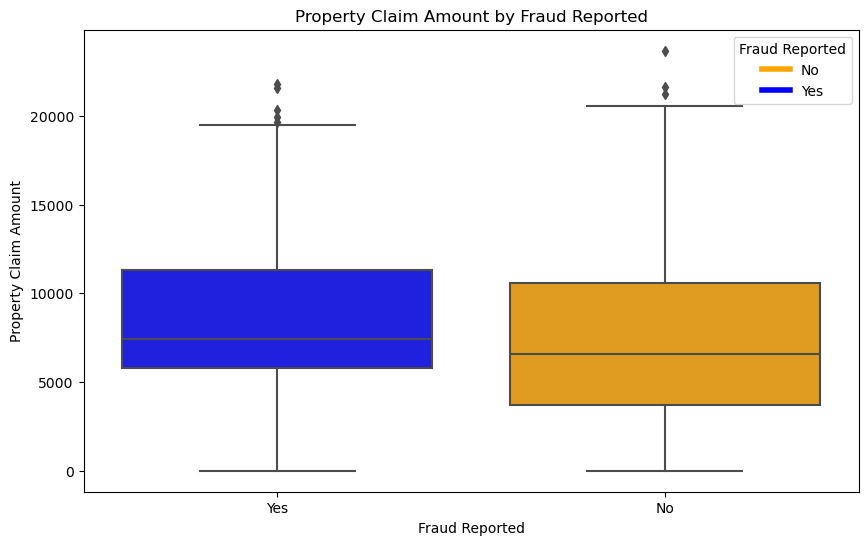

In [23]:
#Lets take a look at fraud vs non-fraud for property_claim
#Lets take a look at fraud vs non-fraud for injury_claim
df['property_claim'] = pd.to_numeric(df['property_claim'], errors='coerce')
plt.figure(figsize=(10,6))
custom_palette = {'No': 'orange', 'Yes': 'blue'}
ax = sns.boxplot(
    x='fraud_reported',
    y='property_claim',
    data=df,
    palette=custom_palette
)
plt.title('Property Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Property Claim Amount')
# Add legend manually
handles = [plt.Line2D([0], [0], color='orange', lw=4), plt.Line2D([0], [0], color='blue', lw=4)]
labels = ['No', 'Yes']
plt.legend(handles, labels, title='Fraud Reported', loc='upper right')
plt.show()

Fraud again clusters in the mid-range (~7.5K vs ~6.5K). Non-fraud includes more very low payouts.

In summary: Fraudulent property claims are higher on average and more concentrated in the mid-range, while non-fraud claims are more varied and include more small payouts. This supports the idea that claim amount is correlated with fraud, but not a perfect predictor on its own



## 📌 Overall Pattern
Across all three claim types:  
- Fraud tends to **cluster in mid-range values** → large enough to profit but not so large that it looks suspicious.  
- Non-fraud includes a broader distribution, especially more very small claims.  



# 📊 Insurance Claims EDA: Key Findings Summary

## 🎯 **Main Discovery: Fraudulent Claims Show Systematic Patterns**

### **💰 Claim Amount Analysis Results**

**Fraudulent claims consistently show higher amounts across all categories:**

| Claim Type | Non-Fraud Mean | Fraud Mean | Fraud Premium |
|------------|----------------|------------|---------------|
| **Vehicle** | ~$36.1K | ~$43.5K | **+20.5%** |
| **Injury** | ~$7.2K | ~$8.2K | **+13.9%** |
| **Property** | ~$6.9K | ~$8.6K | **+24.6%** |
| **Total** | ~$50.3K | ~$60.3K | **+19.9%** |

*Note: **Fraud Premium** represents how much higher fraudulent claims are on average compared to legitimate claims (percentage increase from non-fraud to fraud mean amounts).*

### **🔍 Critical Behavioral Patterns**

**1. Strategic Mid-Range Targeting**
- Fraudsters avoid **extreme values** (very low or very high claims)
- Cluster in **"believable" mid-to-high ranges** to avoid suspicion
- Example: Vehicle claims cluster around $37K-$52K for fraud vs. wider spread for legitimate claims

**2. Tighter Distribution Control**
- **Fraud cases**: More tightly clustered, narrower IQR
- **Legitimate cases**: Wider spread, includes more micro-claims and extreme values
- **Implication**: Fraudsters appear to follow a "playbook" of optimal claim amounts

**3. Minimum Threshold Avoidance**
- Legitimate claims include many **very small payouts**
- Fraudulent claims **rarely go below certain thresholds**
- Suggests fraudsters target "worthwhile" amounts only

### **📈 Statistical Evidence**

**Distribution Characteristics:**
- **Non-fraud**: Broader range, more variability, includes outliers
- **Fraud**: Concentrated in profitable ranges, avoiding suspicious extremes

**Median vs. Mean Patterns:**
- **Vehicle Claims**: Fraud median ($44.8K) > Non-fraud median ($41.2K)
- **Total Claims**: Fraud median ($61.3K) > Non-fraud median ($56.5K)
- Consistent pattern across all claim types

### **🚨 Fraud Detection Implications**

**High-Risk Indicators:**
1. **Total claims in $51K-$73K range** (fraud clustering zone)
2. **Vehicle claims around $37K-$52K** (fraud sweet spot)
3. **Claims avoiding very low amounts** (< $3K total)
4. **Tightly clustered amounts** vs. natural variation

**Detection Strategy:**
- Monitor claims that fall into "too perfect" ranges
- Flag claims lacking natural variation seen in legitimate cases
- Investigate mid-range claims that avoid extremes

### **💡 Key Insight**
**Fraudsters optimize for maximum payout while minimizing detection risk**, resulting in predictable clustering patterns that can be leveraged for automated fraud detection algorithms.